<a href="https://colab.research.google.com/github/Ethanwood1886/COM5013-Project/blob/main/algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import time

# Load the dataset
df = pd.read_csv('diabetes.csv')


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
X = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']]
y = df['Outcome']

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Start Timer Decision Tree
start_time = time.time()

In [7]:
# Apply Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
joblib.dump(dt, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [9]:
# Store Predictions
y_pred_dt = dt.predict(X_test)

In [10]:
# End Timer Decision Tree
end_time = time.time()
decision_tree_time = end_time - start_time
print(f"Decision Tree Training Time: {decision_tree_time:.3f} seconds")

Decision Tree Training Time: 0.105 seconds


In [11]:
# Start Timer Random Forest
start_time = time.time()

In [12]:
# Apply Random Forest
rf = RandomForestClassifier(n_estimators=110, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=110, random_state=42)

In [13]:
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [14]:
# Predictions
y_pred_rf = rf.predict(X_test)

In [15]:
# End Timer Random Forest
end_time = time.time()
random_forest_time = end_time - start_time
print(f"Random Forest Training Time: {random_forest_time:.3f} seconds")

Random Forest Training Time: 0.489 seconds


In [16]:
# Evaluate
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Decision Tree F1-Score: 0.6324786324786325
Random Forest F1-Score: 0.6972477064220184
Random Forest Confusion Matrix:
 [[83 16]
 [17 38]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154



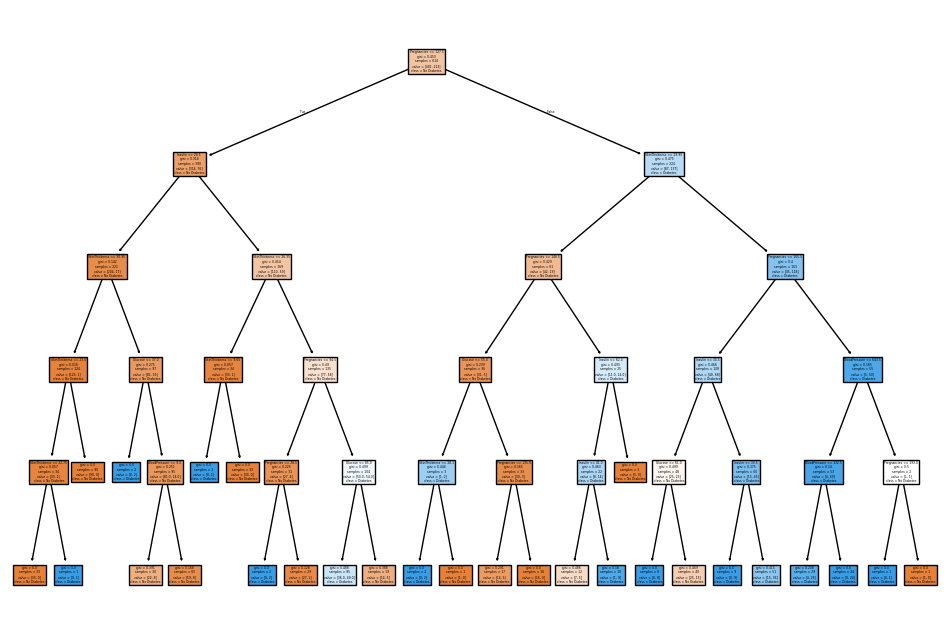

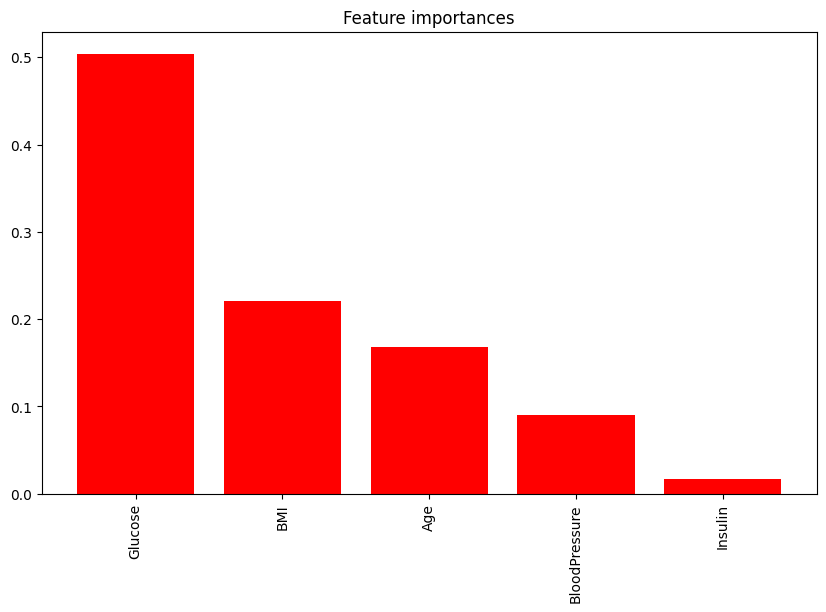

In [17]:
# Decision Tree Visualisation

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=df.columns[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


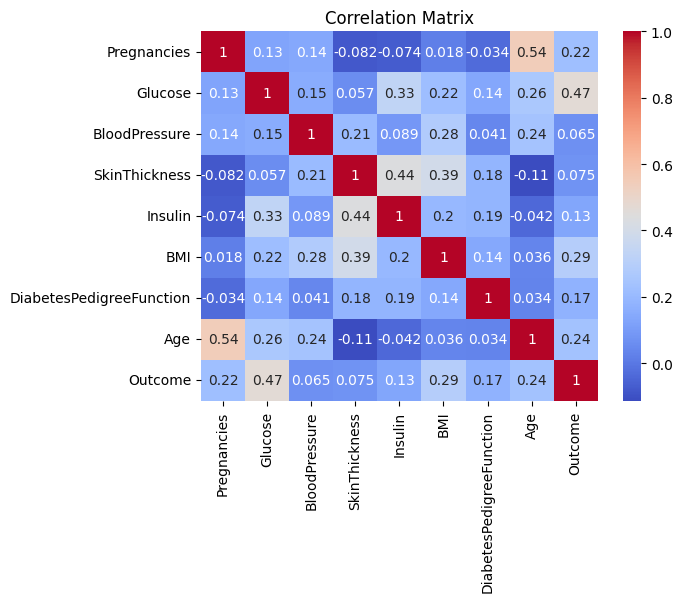

In [21]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# ANN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
df = pd.read_csv('diabetes.csv')
X = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']]
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Start Time SLP
start_time = time.time()

# Single-Layer Perceptron (SLP)
slp = Perceptron(max_iter=1500, random_state=42)
slp.fit(X_train, y_train)
y_pred_slp = slp.predict(X_test)

# End Time SLP
end_time = time.time()
slp_time = end_time - start_time
print(f"SLP Time: {slp_time:.3f} seconds")

f1_slp = f1_score(y_test, y_pred_slp)

joblib.dump(slp, 'slp_model.pkl')

# Start Timer MLP
start_time = time.time()

# Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# End Timer MLP
end_time = time.time()
mlp_time = end_time - start_time
print(f"MLP Time: {mlp_time:.3f} seconds")

f1_mlp = f1_score(y_test, y_pred_mlp)

joblib.dump(mlp, 'mlp_model.pkl')

# Print F1 Scores
print(f"Single-Layer Perceptron F1 Score: {f1_slp:.2f}")
print(f"Multi-Layer Perceptron F1 Score: {f1_mlp:.2f}")

# Classification Reports
print("\nClassification Report for Single-Layer Perceptron:")
print(classification_report(y_test, y_pred_slp, target_names=['Diabetes', 'No Diabetes']))

print("\nClassification Report for Multi-Layer Perceptron:")
print(classification_report(y_test, y_pred_mlp, target_names=['Diabetes', 'No Diabetes']))

# Confusion Matrices
conf_matrix_slp = confusion_matrix(y_test, y_pred_slp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print("\nConfusion Matrix for Single-Layer Perceptron:")
print(conf_matrix_slp)

print("\nConfusion Matrix for Multi-Layer Perceptron:")
print(conf_matrix_mlp)


SLP Time: 0.003 seconds
MLP Time: 3.748 seconds
Single-Layer Perceptron F1 Score: 0.62
Multi-Layer Perceptron F1 Score: 0.66

Classification Report for Single-Layer Perceptron:
              precision    recall  f1-score   support

    Diabetes       0.80      0.79      0.79       150
 No Diabetes       0.61      0.63      0.62        81

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231


Classification Report for Multi-Layer Perceptron:
              precision    recall  f1-score   support

    Diabetes       0.81      0.82      0.82       150
 No Diabetes       0.66      0.65      0.66        81

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231


Confusion Matrix for Single-Layer Perceptron:
[[118  32]
 [ 30  51]]

Confusion Matrix for Multi-Layer Perceptron:
[[

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load the Pima Indians Diabetes dataset
pima = fetch_openml(name="diabetes", version=1, as_frame=True)
X, y = pima.data, pima.target

# Convert target labels to binary (0 = Negative, 1 = Positive)
y = (y == 'tested_positive').astype(int)

# Reshape data to fit CNN input (samples, height, width, channels)
X = X.values.reshape(-1, 8, 1, 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the dataset
scaler = StandardScaler()
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)
X_train = X_train_flat.reshape(X_train.shape)
X_test = X_test_flat.reshape(X_test.shape)

# Start Timer CNN
start_time = time.time()

# Build a simple CNN model
model = Sequential([
    Conv2D(16, kernel_size=(1, 1), activation='relu', input_shape=(8, 1, 1)),
    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # First hidden layer
    Dropout(0.3),
    Dense(16, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['f1_score'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

model.save('cnn_model.keras')

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# End Timer CNN
end_time = time.time()
cnn_time = end_time - start_time
print(f"CNN Time: {cnn_time:.3f} seconds")

f1_cnn = f1_score(y_test, y_pred)

print(f"CNN F1 Score (Pima Indians): {f1_cnn:.2f}")

# Classification Report
print("\nClassification Report for CNN:")
print(classification_report(y_test, y_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - f1_score: 0.5345 - loss: 0.9445 - val_f1_score: 0.5269 - val_loss: 0.5501
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - f1_score: 0.5049 - loss: 0.6226 - val_f1_score: 0.5269 - val_loss: 0.5116
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.5060 - loss: 0.5702 - val_f1_score: 0.5269 - val_loss: 0.5171
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.5131 - loss: 0.5510 - val_f1_score: 0.5269 - val_loss: 0.4870
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.5197 - loss: 0.5320 - val_f1_score: 0.5269 - val_loss: 0.4842
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.4977 - loss: 0.5374 - val_f1_score: 0.5269 - val_loss: 0.4771
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.4963 - loss: 0.5085 - val_f1_score: 0.5269 - val_loss: 0.4658
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.5255 - loss: 0.5423 - val_f1_score: 0.5269 - val_loss: 0.4592
